In [2]:
# ich importiere die benötigten Libraries

import pandas as pd
%matplotlib inline

## Saison 18/19

In [2]:
# ich lese die csv-Datei ein, die ich vom Scraping abgespeichert habe und definiere sie als Dataframe:

df_1819 = pd.read_csv('saison_1819.csv')

In [16]:
# ich sortiere das Dataframe anhand der Spalte 'Marktwert'

df_1819.sort_values('Marktwert', ascending=False)

,Unnamed: 0,Club,Marktwert,Punkte,Geld_pro_Punkt
2,0,BSC Young Boys,69.25,49,1.413265
0,1,FC Basel,50.25,30,1.675000
3,2,FC Sion,28.05,21,1.335714
1,3,Grasshoppers,26.50,17,1.558824
5,4,FC Luzern,22.95,25,0.918000
6,5,FC Zürich,21.65,25,0.866000
8,6,FC St. Gallen,18.90,23,0.821739
9,7,FC Thun,18.25,28,0.651786
4,8,FC Lugano,17.63,19,0.927895
7,9,NE Xamax,10.90,13,0.838462


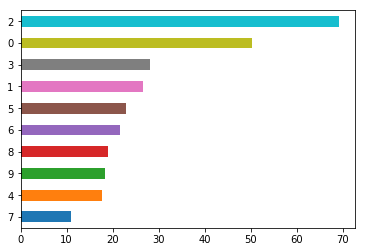

In [17]:
# und erstelle daraus eine Balkengrafik (bar chart)
# hier sieht man, wer in der aktuellen Saison über die grösste finanzielle Power verfügte

df_1819['Marktwert'].sort_values().plot(kind='barh')

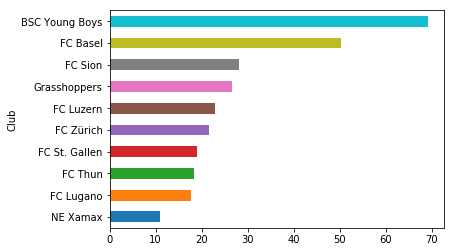

In [18]:
# oben sehe ich allerdings noch nicht, welcher Balken zu welchem Club gehört
# deshalb muss ich die Spalten 'Club' und 'Marktwert' kombinieren

df_1819.groupby('Club')['Marktwert'].sum().sort_values().plot(kind='barh')

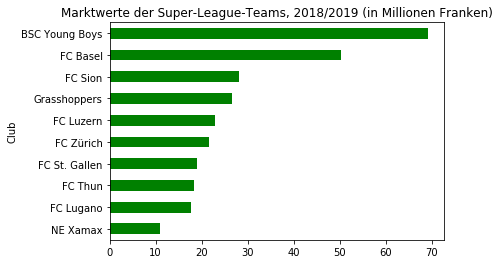

In [20]:
# ich will den Chart noch verschönern, z.B. eine einheitliche Farbe geben, einen Titel und eine Achsenbeschriftung
# dafür hat die plot-Funktion einige Parameter:

df_1819.groupby('Club')['Marktwert'].sum().sort_values().plot(kind='barh', 
                                                                   x='Marktwert', 
                                                                   y='Team',
                                                                   color='green',
                                                                   title='Marktwerte der Super-League-Teams, 2018/2019 (in Millionen Franken)')

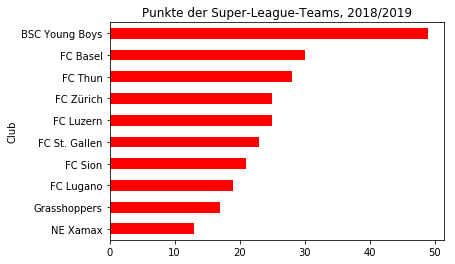

In [22]:
# diesem chart setze ich denjenigen mit den Punkten gegenüber

df_1819.groupby('Club')['Punkte'].sum().sort_values().plot(kind='barh', 
                                                                   x='Punkte', 
                                                                   y='Team',
                                                                   color='red',
                                                                   title='Punkte der Super-League-Teams, 2018/2019')

#### Die Rangfolge der Teams in den beiden Grafiken unterscheidet sich: Thun z.B. rückt nach oben, hat also mehr Punkte geholt und belegt deshalb einen höheren Rang als es der Marktwert vermuten liess. Um dies noch besser zu sehen, könnte man ein Flussdiagramm zeichnen. Dafür bräuchte ich allerdings die Hilfe der Infografik/des Interaktiv-Teams 

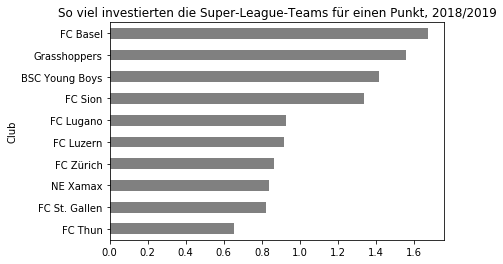

In [23]:
# um den Zusammenhang zwischen Marktwert und Punkten zu veranschaulichen, habe ich ja die Spalte 'Geld_pro_Punkt'
# ich kreiere anhand dieser Spalte ebenfalls einen bar chart:

df_1819.groupby('Club')['Geld_pro_Punkt'].sum().sort_values().plot(kind='barh', 
                                                                   x='Geld pro Punkt', 
                                                                   y='Club',
                                                                   color='grey',
                                                                   title='So viel investierten die Super-League-Teams für einen Punkt, 2018/2019')

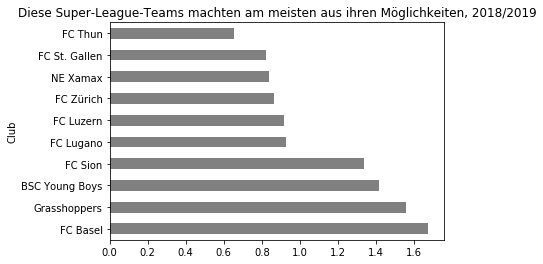

In [24]:
# ich könnte den chart aber auch umkehren
# so stehen die Teams oben, die aus einem günstigen Team viel herausgeholt haben:

df_1819.groupby('Club')['Geld_pro_Punkt'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                                  x='Geld pro Punkt',
                                                                                  y='Club',
                                                                                  color='grey',
                                                                                  title='Diese Super-League-Teams machten am meisten aus ihren Möglichkeiten, 2018/2019')

## Alle Saisons

In [52]:
# ich lese die zweite csv-Datei ein, die ich vom Scraping abgespeichert habe und gebe sie als Dataframe aus:

df_all = pd.read_csv('alle_saisons.csv')
df_all.head(5)

,Unnamed: 0,Jahr,Marktwert,Mannschaft,Punkte
0,0,2005,34.43,FC Basel,78
1,1,2005,16.90,Grasshoppers,55
2,2,2005,13.88,BSC Young Boys,62
3,3,2005,11.38,FC Zürich,78
4,4,2005,11.18,FC Aarau,35


In [53]:
# ich merke gerade, dass mir bei dieser Tabelle die Spalte 'Geld_pro_Punkt' fehlt und ergänze das:

df_all['Geld_pro_Punkt'] =  df_all['Marktwert'] / df_all['Punkte']
df_all.head(5)

,Unnamed: 0,Jahr,Marktwert,Mannschaft,Punkte,Geld_pro_Punkt
0,0,2005,34.43,FC Basel,78,0.441410
1,1,2005,16.90,Grasshoppers,55,0.307273
2,2,2005,13.88,BSC Young Boys,62,0.223871
3,3,2005,11.38,FC Zürich,78,0.145897
4,4,2005,11.18,FC Aarau,35,0.319429


In [54]:
# ich speichere das neue Dataframe der Vollständigkeit halber noch als CSV-Datei ab

df_all.to_csv('alle_saisons_neu.csv')

### Marktwerte

In [55]:
# ich zeige die Entwicklung des Gesamtmarktwerts der Liga über alle Jahre auf
# dazu summiere ich die Markwerte pro Jahr auf und sortiere sie:

df_all.groupby('Jahr')['Marktwert'].sum().sort_index()

Jahr
2005    116.40
2006    137.28
2007    132.74
2008    145.02
2009    183.21
2010    182.78
2011    195.99
2012    190.58
2013    215.43
2014    193.02
2015    263.77
2016    257.75
2017    243.97
Name: Marktwert, dtype: float64

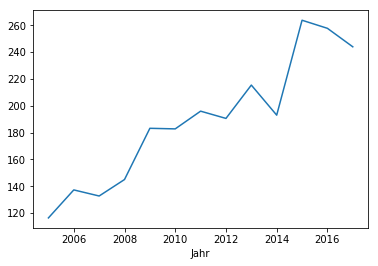

In [56]:
# ich erstelle daraus einen line-chart:

df_all.groupby('Jahr')['Marktwert'].sum().sort_index().plot()

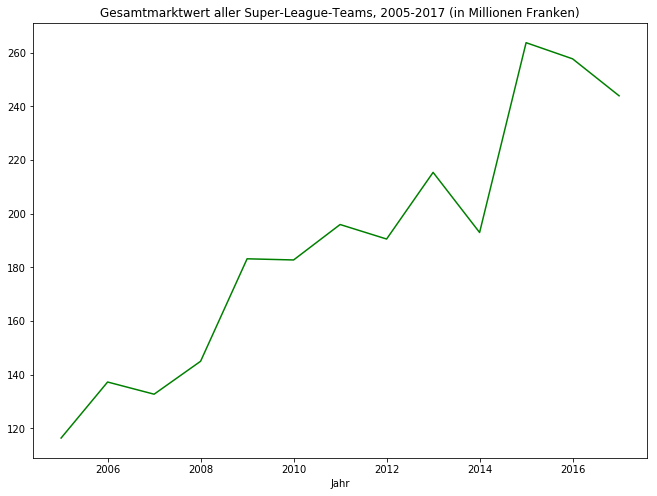

In [51]:
# es ist klar ersichtlich, dass der Gesamtmarktwert der Liga über die Jahre fast kontinuierlich zugenommen hat
# auch diesen chart kann ich noch verschönern

df_all.groupby('Jahr')['Marktwert'].sum().sort_index().plot(x='Jahr',
                                                            y='Marktwert',
                                                            color='green',
                                                            figsize=(11,8),
                                                            title='Gesamtmarktwert aller Super-League-Teams, 2005-2017 (in Millionen Franken)')

In [59]:
# dementsprechend sollten sich auch die Investitionen der Teams pro Punkt entwickelt haben

df_all.groupby('Jahr')['Geld_pro_Punkt'].sum().sort_index()

Jahr
2005    2.187095
2006    2.818719
2007    2.776899
2008    2.895509
2009    3.865285
2010    3.673152
2011         inf
2012    3.934850
2013    4.163633
2014    3.830089
2015    5.190032
2016    4.860527
2017    4.913758
Name: Geld_pro_Punkt, dtype: float64

In [68]:
# hier gibt es ein Problem: für das Jahr 2011 gibt es keine Zahl, sogar eine infinite number (inf) an
# der Grund: Neuchatel Xamax musste in jenem Jahr zwangsabsteigen und erhielt keine Punkte

# ich ersetze in der betreffenden Zeile (63) deshalb 'inf' mit 0 (Null) > denn 0 durch etwas gibt ja Null

df_all.at[63, 'Geld_pro_Punkt'] = 0
df_all.groupby('Jahr')['Geld_pro_Punkt'].sum().sort_index()

Jahr
2005    2.187095
2006    2.818719
2007    2.776899
2008    2.895509
2009    3.865285
2010    3.673152
2011    4.594014
2012    3.934850
2013    4.163633
2014    3.830089
2015    5.190032
2016    4.860527
2017    4.913758
Name: Geld_pro_Punkt, dtype: float64

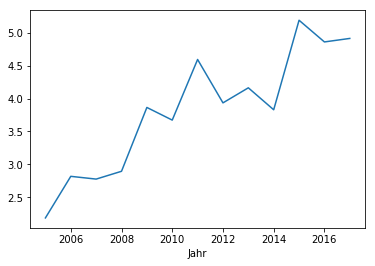

In [69]:
df_all.groupby('Jahr')['Geld_pro_Punkt'].sum().sort_index().plot()

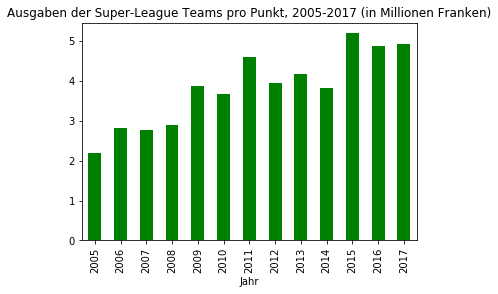

In [71]:
# man könnte das auch als Säulendiagramm darstellen:

df_all.groupby('Jahr')['Geld_pro_Punkt'].sum().sort_index().plot(kind='bar',
                                                                 x='Jahr',
                                                                 y='Geld pro Punkt',
                                                                 color='green',
                                                                 title='Ausgaben der Super-League Teams pro Punkt, 2005-2017 (in Millionen Franken)')

#### Auch in der Schweiz fliesst also immer mehr Geld in den Fussball. Ich will aber auch die These beweisen, dass erfolgreicher ist, wer mehr Geld investiert und sich ein teures Team leistet.

### Zusammenhang Geld und Erfolg

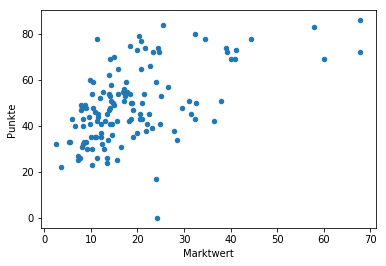

In [88]:
# dazu erstelle ich einen scatterplot-chart mit den Spalten 'Marktwert' und 'Punkte' als Achsen:

df_all.plot(kind='scatter', x='Marktwert', y='Punkte')

/Users/yannick/.virtualenvs/virtuelle_umgebung/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


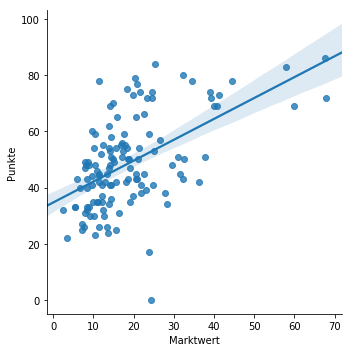

In [91]:
# man sieht hier schon eine Tendenz
# aber wenn ich es genau machen will, muss ich die Regression anzeigen:

import seaborn as sns
sns.lmplot(x="Marktwert", y="Punkte", data=df_all);

#### Hier zeigt sich eine klare Steigung. Das heisst: teurere Mannschaften holen mehr Punkte > These belegt

#### Wieviel lassen sich die Teams einen Punkt eigentlich "kosten"?

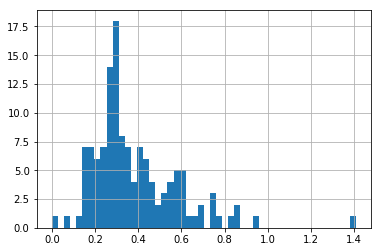

In [87]:
# ich will darstellen, wie die Werte in der Spalte 'Geld_pro_Punkt' verteilt sind
# dazu erstelle ich ein Histogramm:

df_all['Geld_pro_Punkt'].hist(bins=50)

In [74]:
# mit Abstand am häufigsten haben die Teams also etwa 300'000 Franken pro Punkt investiert

# ich möchte aber vor allem wissen, wieviel die Teams im Schnitt über alle Jahre pro Punkt ausgegeben haben

df_all.groupby('Mannschaft')['Geld_pro_Punkt'].sum()

Mannschaft
AC Bellinzona      1.022984
BSC Young Boys     5.328444
FC Aarau           2.146433
FC Basel           7.308914
FC Lugano          0.921181
FC Luzern          3.774312
FC Schaffhausen    0.456242
FC Sion            7.080993
FC St. Gallen      3.904544
FC Thun            2.625851
FC Vaduz           1.162987
FC Zürich          4.752509
Grasshoppers       5.197679
Lausanne-Sport     1.984802
Neuchâtel Xamax    1.347746
Servette FC        0.608878
Yverdon-Sport      0.079062
Name: Geld_pro_Punkt, dtype: float64

In [78]:
# ich ordne die Auflistung nach der Spalte 'Geld_pro_Punkt':

df_all.groupby('Mannschaft')['Geld_pro_Punkt'].sum().sort_values(ascending=False)

Mannschaft
FC Basel           7.308914
FC Sion            7.080993
BSC Young Boys     5.328444
Grasshoppers       5.197679
FC Zürich          4.752509
FC St. Gallen      3.904544
FC Luzern          3.774312
FC Thun            2.625851
FC Aarau           2.146433
Lausanne-Sport     1.984802
Neuchâtel Xamax    1.347746
FC Vaduz           1.162987
AC Bellinzona      1.022984
FC Lugano          0.921181
Servette FC        0.608878
FC Schaffhausen    0.456242
Yverdon-Sport      0.079062
Name: Geld_pro_Punkt, dtype: float64

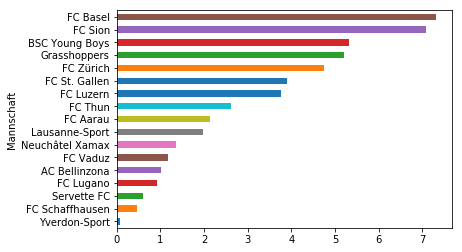

In [85]:
# ich erstelle daraus einen bar-chart:

df_all.groupby('Mannschaft')['Geld_pro_Punkt'].sum().sort_values().plot(kind='barh')

In [83]:
# Achtung! Manche Teams haben alle 13 Saisons in der Super League gespielt (Basel, YB und GC), andere nur eine
# ich muss deshalb den Durchschnittswert pro Saison berechnen
# zuerst rechne ich alle Werte durch 13 > damit erhalte ich zumindest von drei Teams die richtigen Werte

df_geld = df_all.groupby('Mannschaft')['Geld_pro_Punkt'].sum().sort_values(ascending=False)
df = df_geld/13
print(df)

Mannschaft
FC Basel           0.562224
FC Sion            0.544692
BSC Young Boys     0.409880
Grasshoppers       0.399821
FC Zürich          0.365578
FC St. Gallen      0.300350
FC Luzern          0.290332
FC Thun            0.201989
FC Aarau           0.165110
Lausanne-Sport     0.152677
Neuchâtel Xamax    0.103673
FC Vaduz           0.089461
AC Bellinzona      0.078691
FC Lugano          0.070860
Servette FC        0.046837
FC Schaffhausen    0.035096
Yverdon-Sport      0.006082
Name: Geld_pro_Punkt, dtype: float64


In [94]:
# ich habe aber nicht herausgefunden, wie ich in einem Schritt für jedes Team einen eigenen Durchschnittswert berechnen kann
# deshalb habe ich die Berechnung schnell in Google Sheets von Hand vorgenommen und als CSV abgespeichert

df_effizienz = pd.read_csv('geld_pro_punkt.csv')
df_effizienz

,Mannschaft,Geld total,Geld pro Punkt
0,Neuchâtel Xamax,1.347746,0.224624
1,FC Thun,2.625851,0.238714
2,FC Lugano,0.921181,0.307060
3,FC Luzern,3.774312,0.314526
4,FC St. Gallen,3.904544,0.354959
5,FC Zürich,4.752509,0.396042
6,Grasshoppers,5.197679,0.399821
7,BSC Young Boys,5.328444,0.409880
8,FC Basel,7.308914,0.562224
9,FC Sion,7.080993,0.590083


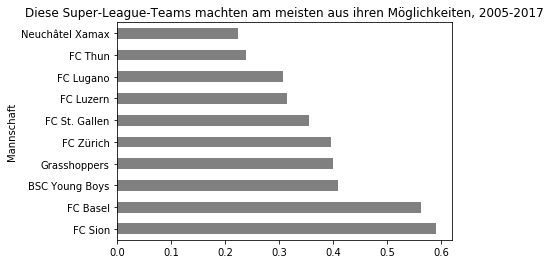

In [96]:
# ich erstelle aus dem neuen Dataframe einen bar-chart:

df_effizienz.groupby('Mannschaft')['Geld pro Punkt'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                                  x='Geld pro Punkt',
                                                                                  y='Club',
                                                                                  color='grey',
                                                                                  title='Diese Super-League-Teams machten am meisten aus ihren Möglichkeiten, 2005-2017')

#### Das Resultat: Xamax und Thun haben in den letzten 13 Jahren im Schnitt am wenigsten Geld pro Punkt investiert, Basel und Sion am meisten.

#### Wie zeigt sich das bei der Rangveränderung? Damit meine ich den Unterschied zwischen dem erwartbaren Rang (gemäss Marktwert) und dem tatsächlich erzielten Rang (Tabelle Ende Saison)

In [4]:
# die erste Tabelle auf Seite trasnfermarkt zeigt leider keinen Rang (gemäss Marktwert), den ich mit dem Rang in der zweiten Tabelle vergleichen könnte
# deshalb habe ich die Rangveränderung mit Google Sheets per Hand ausgerechnet und in einem csv-File abgespeichert

df_performer = pd.read_csv('under_overperformer.csv')
df_performer

,Mannschaft,Saisons 05-17,Rangsumme,Anzahl überd.,Anzahl erwartet,Anzahl unterd.
0,AC Bellinzona,3,0,1,1,1
1,BSC Young Boys,13,-1,4,5,4
2,FC Aarau,7,2,2,3,2
3,FC Basel,13,-4,0,9,4
4,FC Lugano,3,5,2,1,0
5,FC Luzern,12,13,7,3,2
6,FC Schaffhausen,2,0,0,2,0
7,FC Sion,12,-28,1,1,10
8,FC St. Gallen,11,-1,5,2,4
9,FC Thun,11,30,8,1,1


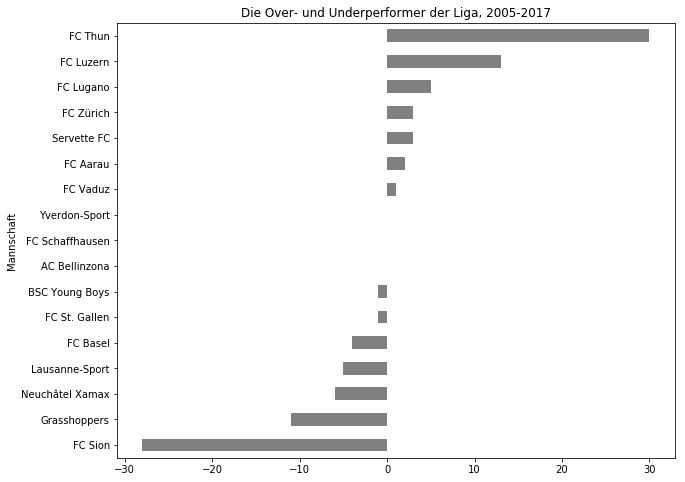

In [15]:
# ich könnte daraus einen gewöhnlichen bar-chart machen:

df_performer.groupby('Mannschaft')['Rangsumme'].sum().sort_values().plot(kind='barh',
                                                                                  x='Rangsumme',
                                                                                  y='Club',
                                                                                  color='grey',
                                                                                  figsize=(10,8),
                                                                                  title='Die Over- und Underperformer der Liga, 2005-2017')

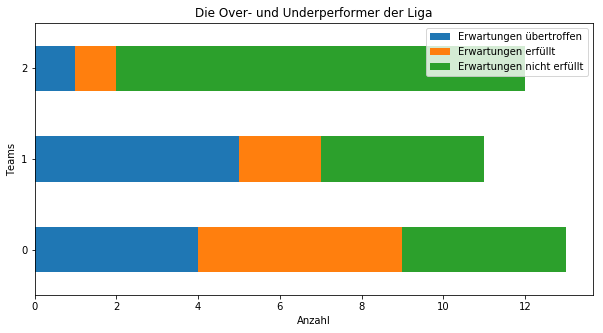

In [8]:
# ich möchte aber lieber einen stacked bar chart (gestapelte Balken machen), um die Verteilung zu sehen
# wie eine kurze Recherche auf stackoverflow etc. zeigt, gibt es dafür verschiedene Wege, z.B. so:

a = [4,5,1]
b = [5,2,1]
c = [4,4,10]
df = pd.DataFrame({'Erwartungen übertroffen' : a,'Erwartungen erfüllt' : b, 'Erwartungen nicht erfüllt' : c})
ax = df.plot.barh(stacked=True);

ax.figure.set_size_inches(10,5)
ax.set_title("Die Over- und Underperformer der Liga")
ax.set_ylabel('Teams')
ax.set_xlabel('Anzahl')
ax.legend(loc='upper right')

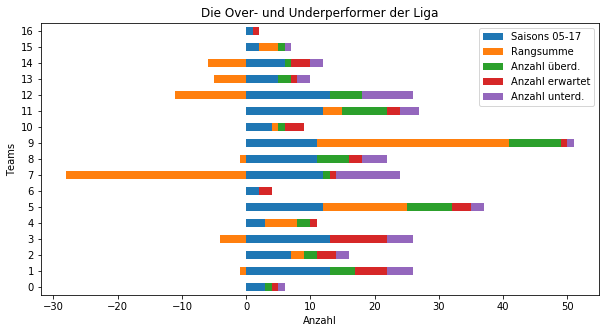

In [12]:
# ich will die Werte aber nicht selbst definieren, sondern mein Dataframe 'df_performer' verwenden

ax = df_performer.plot.barh(stacked=True);

ax.figure.set_size_inches(10,5)
ax.set_title("Die Over- und Underperformer der Liga")
ax.set_ylabel('Teams')
ax.set_xlabel('Anzahl')
ax.legend(loc='upper right')

In [16]:
# jetzt muss ich noch die Spalten löschen, die ich gar nicht brauche: 'Saisons 05-17' und 'Rangsumme'

del df_performer['Saisons 05-17']
del df_performer['Rangsumme']

df_performer

,Mannschaft,Anzahl überd.,Anzahl erwartet,Anzahl unterd.
0,AC Bellinzona,1,1,1
1,BSC Young Boys,4,5,4
2,FC Aarau,2,3,2
3,FC Basel,0,9,4
4,FC Lugano,2,1,0
5,FC Luzern,7,3,2
6,FC Schaffhausen,0,2,0
7,FC Sion,1,1,10
8,FC St. Gallen,5,2,4
9,FC Thun,8,1,1


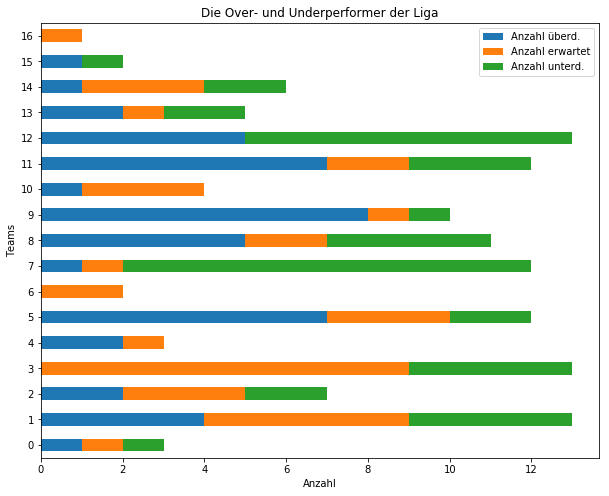

In [17]:
# ich lasse mit die Grafik noch einmal ausgeben:

ax = df_performer.plot.barh(stacked=True);

ax.figure.set_size_inches(10,8)
ax.set_title("Die Over- und Underperformer der Liga")
ax.set_ylabel('Teams')
ax.set_xlabel('Anzahl')
ax.legend(loc='upper right')

In [19]:
# ich will auf der y-Achse keine Nummerierung, sondern die Namen der Clubs
# dafür muss ich den Index des Dataframes neu bestimmen:

df_performer.set_index('Mannschaft', inplace=True)
df_performer

,Anzahl überd.,Anzahl erwartet,Anzahl unterd.
Mannschaft,,,
AC Bellinzona,1,1,1
BSC Young Boys,4,5,4
FC Aarau,2,3,2
FC Basel,0,9,4
FC Lugano,2,1,0
FC Luzern,7,3,2
FC Schaffhausen,0,2,0
FC Sion,1,1,10
FC St. Gallen,5,2,4


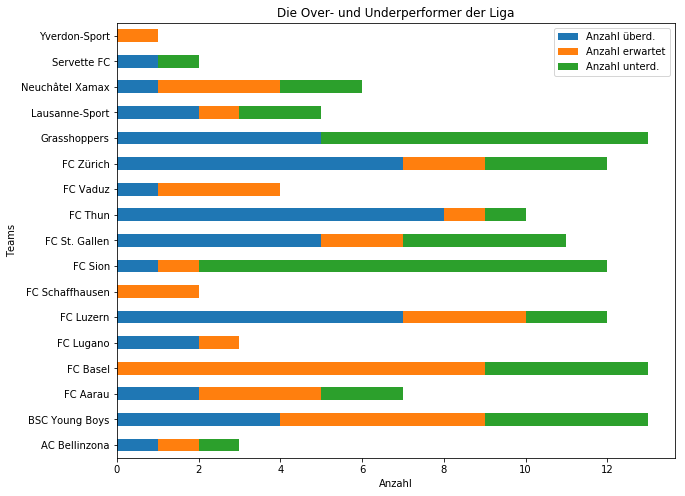

In [20]:
# jetzt sollte ich die Grafik erhalten, die ich will:

ax = df_performer.plot.barh(stacked=True);

ax.figure.set_size_inches(10,8)
ax.set_title("Die Over- und Underperformer der Liga")
ax.set_ylabel('Teams')
ax.set_xlabel('Anzahl')
ax.legend(loc='upper right')